In [1]:
import pschitt.geometry as geo
import numpy as np
import matplotlib.pyplot as plt
import pschitt.sky_objects as sky
import pschitt.camera_image as ci
import pschitt.hillas as hillas
import pschitt.vizualisation as viz
from importlib import reload
import math

In [2]:
reload(ci)

<module 'pschitt.camera_image' from '/Users/thomasvuillaume/anaconda/lib/python3.5/site-packages/pschitt-1.0-py3.5.egg/pschitt/camera_image.py'>

In [3]:
%matplotlib inline

In [4]:
shower = sky.shower()

shower.impact_point = np.array([80,60,0])

#shower direction
shower.alt = math.radians(80)
shower.az = math.radians(90)

#pointing direction
talt = math.radians(81)
taz = math.radians(89)

#shower parameters
shower_top = 12000
shower_length = 8000
shower_width = 100

shower.number_of_particles = int(1e4)

In [5]:
shower.gaussian_ellipsoide(shower_top, shower_length, shower_width)

In [6]:
tel_normal = geo.altaz_to_normal(talt,taz)
tel1 = geo.Telescope([200,200,0],tel_normal)
tel2 = geo.Telescope([-200,200,0],tel_normal)
tel3 = geo.Telescope([-200,-200,0],tel_normal)
tel4 = geo.Telescope([200,-200,0],tel_normal)
tel5 = geo.Telescope([0,0,0],tel_normal)

alltel = [tel1, tel2, tel3, tel4, tel5]

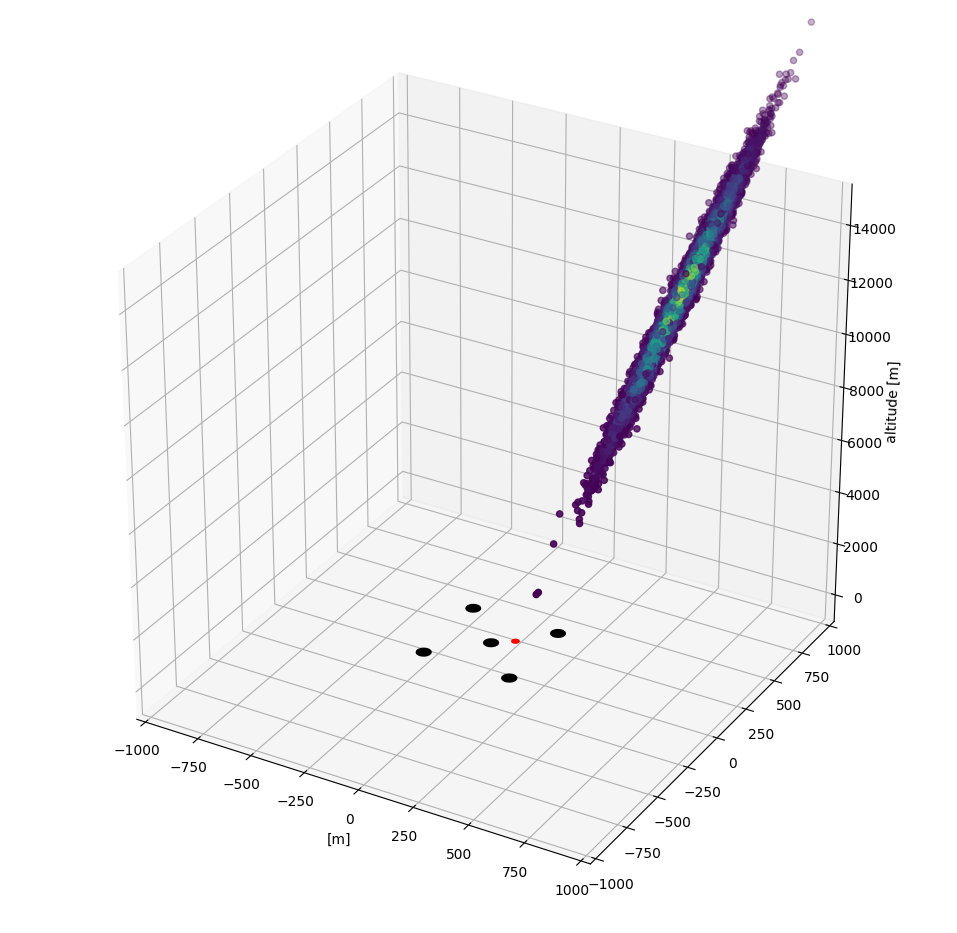

In [7]:
plt.figure(figsize=(9,6))
viz.plot_shower3d(shower, alltel, density_color=True)
# plt.savefig('../Images/ICRC2017/shower3D.eps', fmt='eps', dpi=300)

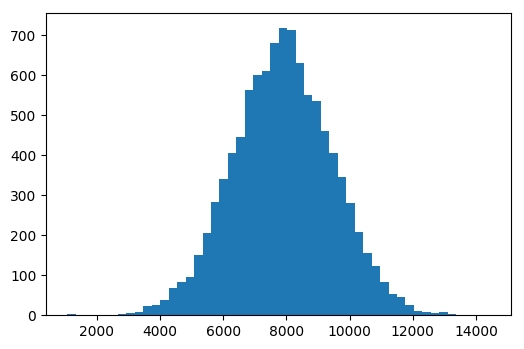

In [10]:
plt.hist(shower.particles[:,2], bins=50);

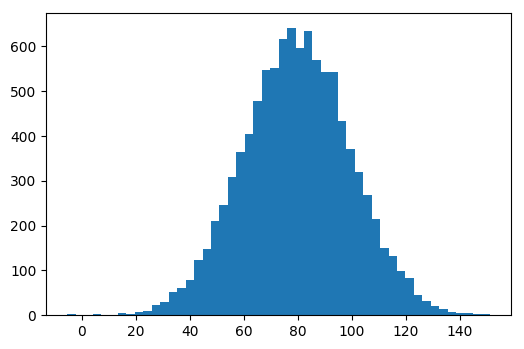

In [12]:
plt.hist(shower.particles[:,0], bins=50);

(-250, 250)

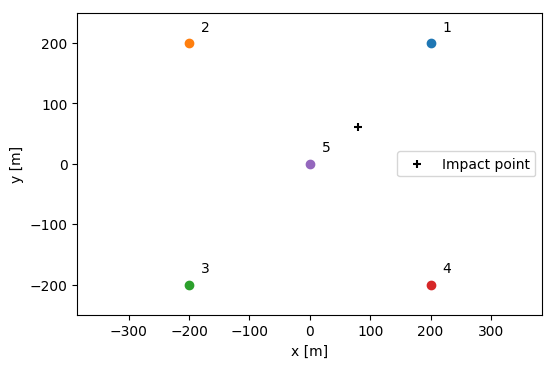

In [13]:
plt.scatter(shower.impact_point[0], shower.impact_point[1], color='black', label='Impact point', marker="+")

viz.plot_array(alltel)
plt.axis('equal')
plt.ylim(-250,250)

In [14]:
trigger_intensity = 20.
noise = 0

In [15]:
ci.array_shower_imaging(shower, alltel, noise)

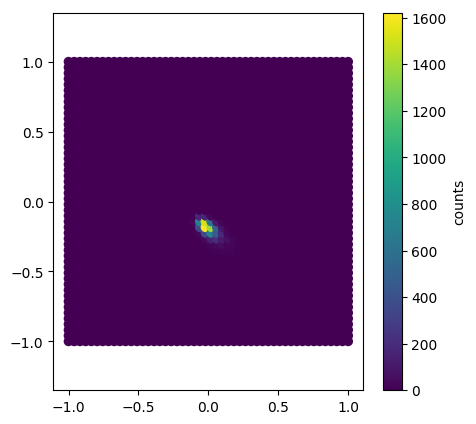

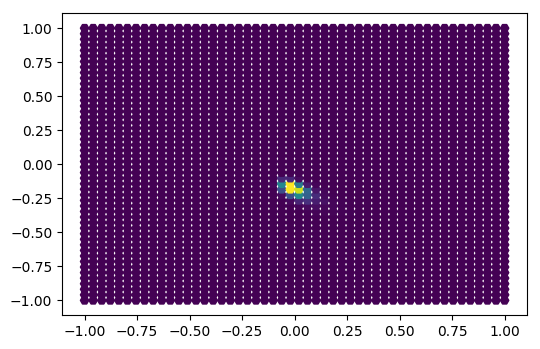

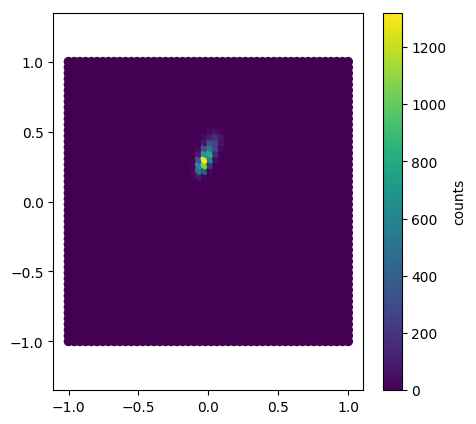

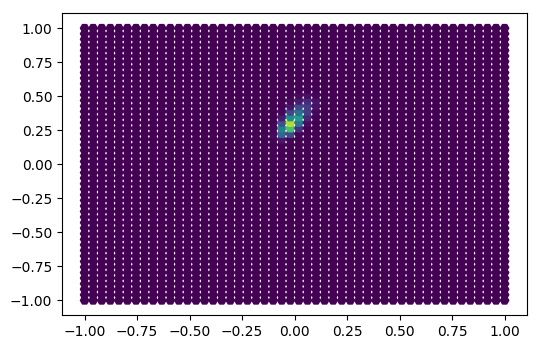

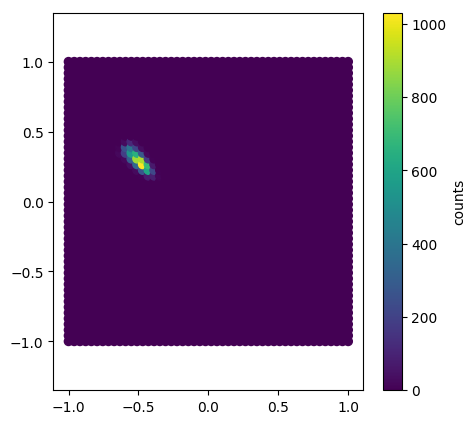

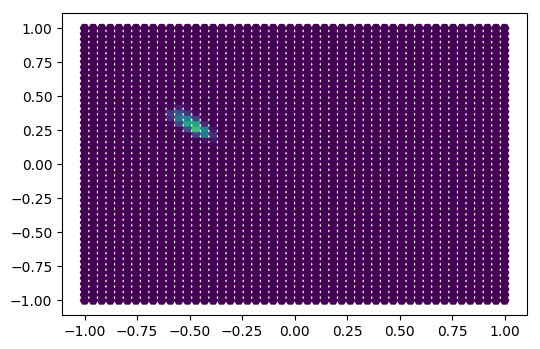

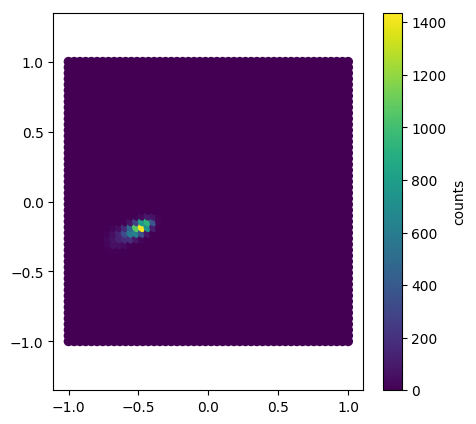

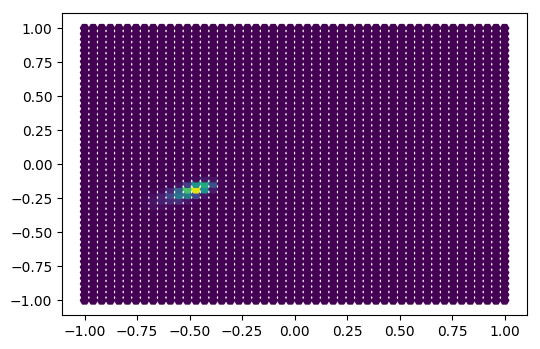

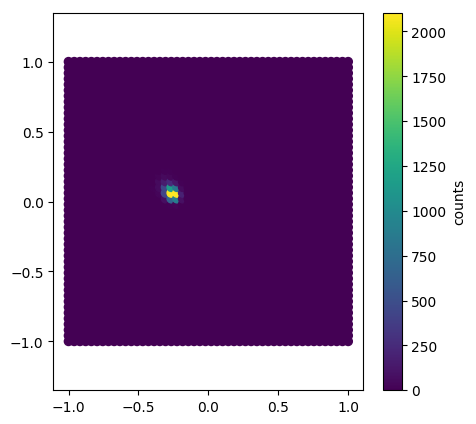

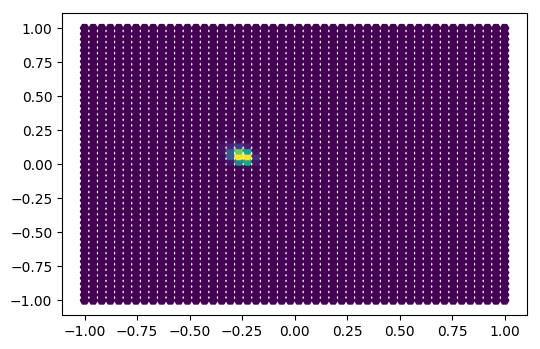

In [16]:
for idx, tel in enumerate(alltel):
    plt.figure(figsize=(5,5))
    viz.display_camera_image(tel)
    plt.scatter(tel.pixel_tab[:,0], tel.pixel_tab[:,1], c = tel.signal_hist, marker='H')
    plt.clim(0,1500)
    # plt.savefig('../share/images/example/tel{0}.eps'.format(idx), fmt='eps', dpi=300)

Number of triggered telescopes =  5


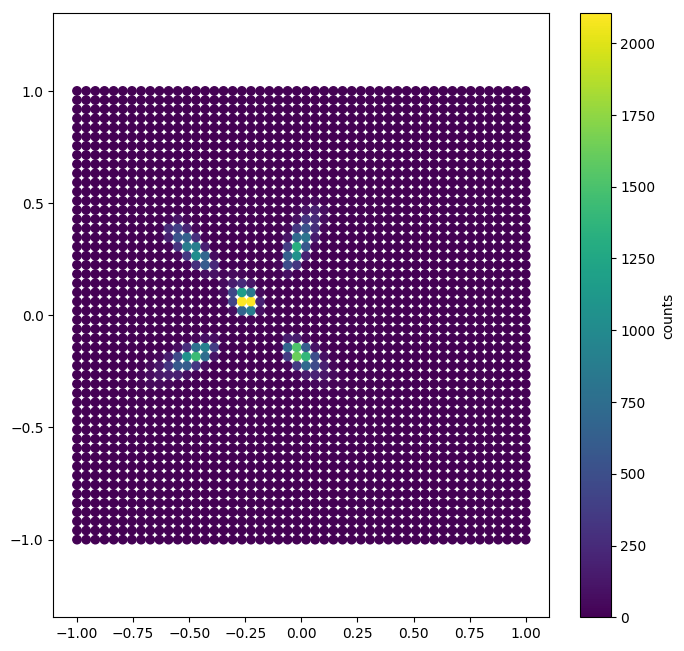

In [17]:
plt.figure(figsize=(8,8))
HP, triggered_telescopes = hillas.array_hillas_parameters(alltel, trigger_intensity)
print("Number of triggered telescopes = ", len(triggered_telescopes))

viz.display_stacked_cameras(triggered_telescopes)

if len(triggered_telescopes)>1:
    pa = hillas.impact_parameter_average(triggered_telescopes, HP)
    p = hillas.impact_parameter_ponderated(triggered_telescopes, HP)

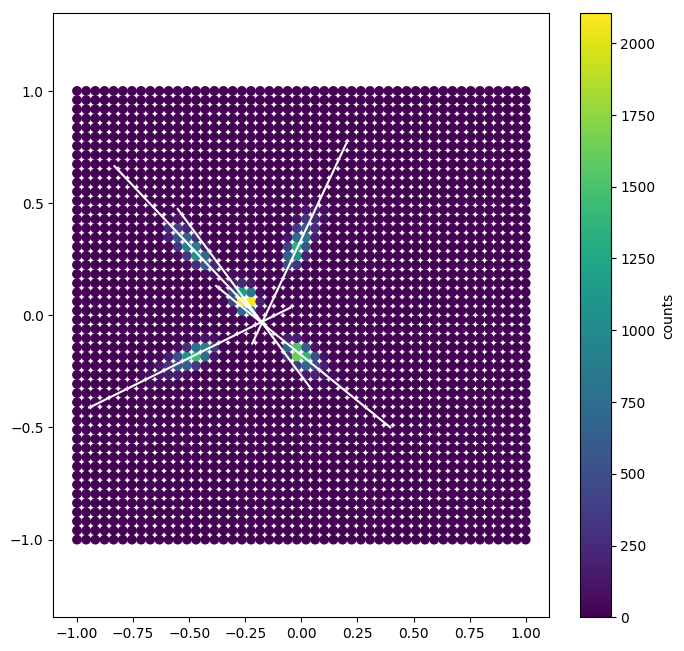

In [18]:
plt.figure(figsize=(8,8))
viz.display_stacked_cameras(alltel)
x = np.linspace(-0.5, 0.5)
for tel, hp in zip(triggered_telescopes, HP):
    plt.plot(hp[1] + x*np.cos(hp[7] + math.pi/2.), hp[2] + x*np.sin(hp[7] + math.pi/2.), color="white")
    plt.axis('equal')
# plt.savefig('../share/images/example/hillas_reco.eps', fmt='eps', dpi=300)

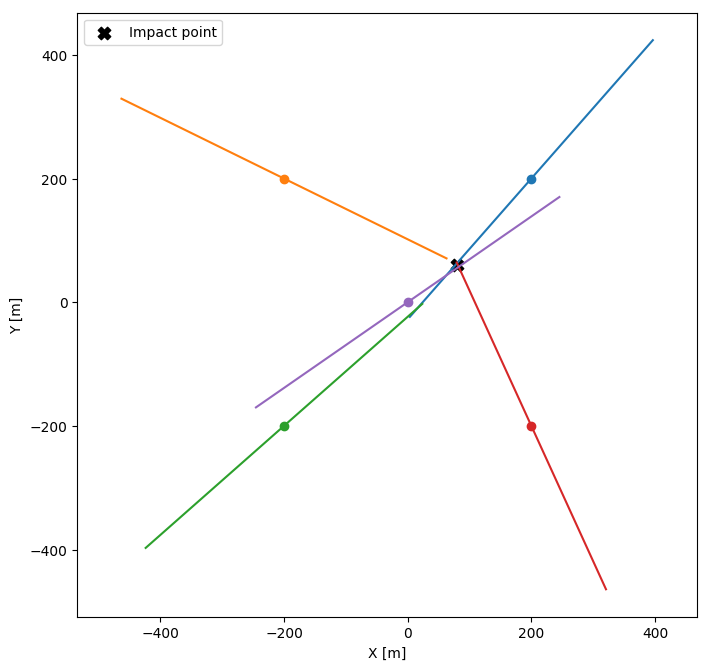

In [19]:
x = np.linspace(-300,300)
HP = np.array(HP)

plt.figure(figsize=(8,8))

plt.axis('equal')
for tel in triggered_telescopes:
    plt.scatter(tel.mirror_center[0], tel.mirror_center[1])
    
for (tel, hp) in zip(triggered_telescopes, HP):
    alt = talt
    az = taz
    psi = hp[7] + np.pi/2.
    n = [
    np.sin(alt)**2 * np.cos(az) * np.cos(psi) - np.sin(alt)*np.sin(az) * np.sin(psi) + np.cos(alt)**2 * np.sin(az)*np.cos(psi),
    np.sin(alt)**2 * np.sin(az) * np.cos(psi) + np.sin(alt)*np.cos(az) * np.sin(psi) - np.cos(alt)**2 * np.cos(az)*np.cos(psi)
    ]
    plt.plot(x*n[0] + tel.mirror_center[0], x*n[1] + tel.mirror_center[1]);

plt.scatter(shower.impact_point[0], shower.impact_point[1], color='black', label='Impact point', marker='X', s=80)
    
plt.axis('equal')
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.legend()
# plt.savefig("../share/images/example/hillasreco_site.eps", fmt='eps', dpi=300)

In [20]:
if len(triggered_telescopes)>1:
    pa = hillas.impact_parameter_average(triggered_telescopes, HP)
    p = hillas.impact_parameter_ponderated(triggered_telescopes, HP)

In [21]:
if len(triggered_telescopes)>1:
    print("Real impact parameter : ", shower.impact_point)
    print("Reconstruction with simple average = %s \tError = %.2fm" % (pa, math.sqrt(((shower.impact_point-pa)**2).sum())))
    print("Reconstruction with ponderation and cut = %s \tError = %.2fm" % (p, math.sqrt(((shower.impact_point-p)**2).sum())))

Real impact parameter :  [80 60  0]
Reconstruction with simple average = [80.654116083211974, 57.853882912376051, 0.0] 	Error = 2.24m
Reconstruction with ponderation and cut = [75.428308929377565, 53.456738492586894, 0.0] 	Error = 7.98m


In [22]:
tel1.camera_center

array([ 200.02730158,  201.56410639,    9.87688341])

In [24]:
len(shower.particles - tel1.camera_center)

10000

In [26]:
distances = np.sqrt(np.sum((shower.particles - tel1.camera_center)**2, axis=1))
len(distances)

10000

In [27]:
distances

array([ 8889.63559852,  7168.00022074,  7441.83012725, ...,  8551.44485444,
        8614.40248402,  7760.06257833])

In [28]:
direction1 = np.array([[0,0,1],[0,0,-1]])
direction2 = np.array([[0,0,1],[0,0,1]])

In [29]:
np.arccos(np.dot(direction1, direction2) / (geo.vector_norm(direction1)*geo.vector_norm(direction2)))

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

In [30]:
tel1.mirror_center

array([200, 200,   0])

In [31]:
from importlib import reload
import pschitt.emission as em
import pschitt.geometry as geo

In [32]:
reload(geo)
reload(em)

<module 'pschitt.emission' from '/Users/thomasvuillaume/anaconda/lib/python3.5/site-packages/pschitt-1.0-py3.5.egg/pschitt/emission.py'>

In [35]:
shower_direction = geo.altaz_to_normal(shower.alt, shower.az)
angles = np.array([geo.angle(shower_direction, particle - tel1.mirror_center) for particle in shower.particles])

In [36]:
import numpy as np

In [41]:
def flux_portion_in_telescope(tel, shower):
    """
    Compute the attenuation factor for the photons from the shower.
    It takes into account the position of the telescope and shower direction and impact parameter
    to get the rate of Cherenkov photons.

    Parameters
    ----------
    tel: telescope class
    shower: shower class

    Returns
    -------
    float between 0 and 1
    """
    particle_distances = geo.distance_shower_camera_center(shower, tel)
    transmissions = em.transmission(distances)
    shower_direction = geo.altaz_to_normal(shower.alt, shower.az)
    angles = np.array([geo.angle(shower_direction, particle - tel.mirror_center) for particle in shower.particles])
    return em.angular_profile_heaviside(angles, 0.02)

In [42]:
flux_portion_in_telescope(tel1, shower)

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
flux_portion_in_telescope(tel1, shower)

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
shower_image = geo.image_shower_pfo(shower.particles, tel1)

In [46]:
shower_cam = geo.site_to_camera_cartesian(shower_image, tel1)

In [47]:
ci.shower_image_in_camera(tel1, shower_cam[:, [0, 1]], 0, impact_distance=0)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [48]:
shower_cam

array([[ -9.16858906e-03,  -1.51015537e-01,  -9.09574729e-16],
       [  4.96991713e-02,  -2.20141966e-01,   6.42881679e-16],
       [ -1.73219378e-02,  -2.08123019e-01,  -7.12845208e-16],
       ..., 
       [ -1.65912256e-02,  -1.55280825e-01,   1.13816350e-15],
       [ -2.54858057e-02,  -1.72714513e-01,   2.92535627e-15],
       [  5.13487562e-02,  -1.79978338e-01,   3.23241674e-15]])

In [49]:
tel1.pixel_tab

array([[-1.        , -1.        ],
       [-1.        , -0.95918367],
       [-1.        , -0.91836735],
       ..., 
       [ 1.        ,  0.91836735],
       [ 1.        ,  0.95918367],
       [ 1.        ,  1.        ]])

In [50]:
ci.photons_to_signal(shower_cam[:, [0, 1]], tel1.pixel_tab)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [51]:
photons = shower_cam[:, [0, 1]]
photons

array([[-0.00916859, -0.15101554],
       [ 0.04969917, -0.22014197],
       [-0.01732194, -0.20812302],
       ..., 
       [-0.01659123, -0.15528083],
       [-0.02548581, -0.17271451],
       [ 0.05134876, -0.17997834]])

In [52]:
d2 = np.sum([(p - tel1.pixel_tab)**2 for p in photons], axis=1)

In [53]:
np.sum((photons[0]-tel1.pixel_tab)**2, axis=1)

array([ 1.7025215 ,  1.63488262,  1.57057568, ...,  2.16200099,
        2.25096353,  2.34325801])

In [54]:
d_max2 = (tel1.pixel_tab[:, 0]**2 + tel1.pixel_tab[:, 1]**2).max()
d_max2

2.0

In [55]:
from numba import jit

In [56]:
@jit
def pixel_in_camera(distances, dist_max2):
    argmin = distances.argmin()
    if distances[argmin] < dist_max2:
        return distances.argmin()
    else:
        return -1
@jit    
def pixel_in_camera2(distances, dist_max2):
    argmin = distances.argmin()
    return (-1 * distances[argmin] > dist_max2) + argmin * distances[argmin] <= dist_max2


In [57]:
distances = np.array([2.0,3,4,5.3,5,32,4,62,4])
dist_max2 = 10


In [58]:
%timeit pixel_in_camera(distances, dist_max2)

573 ns ± 33.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [59]:
%timeit pixel_in_camera2(distances, dist_max2)

483 ns ± 31.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [48]:
%timeit pixel_in_camera(distances, dist_max2)

528 ns ± 4.88 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [49]:
%timeit pixel_in_camera(distances, dist_max2)

524 ns ± 4.72 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [60]:
d_max2 = (tel1.pixel_tab[:, 0] ** 2 + tel1.pixel_tab[:, 1] ** 2).max()

In [61]:
pix_id = np.array([pixel_in_camera(np.sum((p-tel1.pixel_tab)**2, axis=1), d_max2) for p in photons])

In [62]:
len(pix_id)

10000

In [63]:
pix_id.min()

1119

In [64]:
h = np.histogram(pix_id, len(tel1.pixel_tab), range=(0,len(tel1.pixel_tab)))

In [65]:
len(h[0])

2500

In [66]:
h[1]

array([  0.00000000e+00,   1.00000000e+00,   2.00000000e+00, ...,
         2.49800000e+03,   2.49900000e+03,   2.50000000e+03])

In [67]:
bc = np.bincount(pix_id[pix_id>=0], minlength=len(tel1.pixel_tab))

In [68]:
%timeit np.bincount(pix_id[pix_id>=0], minlength=len(tel1.pixel_tab))
%timeit np.histogram(pix_id, range=(0,len(tel1.pixel_tab)), bins=len(tel1.pixel_tab))

41.5 µs ± 3.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
307 µs ± 61.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [59]:
len(bc)

2500

<Container object of 2500 artists>

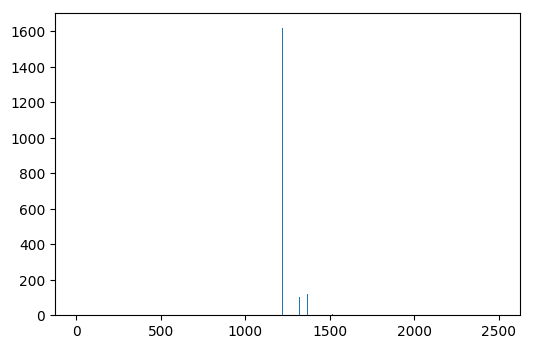

In [69]:
plt.bar(range(len(tel1.pixel_tab)), bc)

In [61]:
im = ci.photons_to_signal(photons,tel1.pixel_tab)

In [62]:
im[1220]

1495.0

In [63]:
bc[1220]

1495

In [64]:
%timeit ci.photons_to_signal(photons,tel1.pixel_tab)
%timeit ci.photons_to_signal_2(photons,tel1.pixel_tab)

234 ms ± 3.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
265 ms ± 6.54 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [65]:
# ci.photons_to_signal_2(photons,tel1.pixel_tab)

In [70]:
def photons_to_signal_2(photon_pos_tab, pixel_tab):

    d_max2 = (pixel_tab[:, 0] ** 2 + pixel_tab[:, 1] ** 2).max()
    pixel_id = np.array([pixel_in_camera(np.sum((p-pixel_tab)**2, axis=1), d_max2) for p in photon_pos_tab])
    return np.bincount(pixel_id[pixel_id >= 0], minlength=len(pixel_tab))


In [71]:
ci.photons_to_signal_2(photons, tel1.pixel_tab)

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
photon_pos_tab = photons

In [73]:
d_max2 = (tel1.pixel_tab[:, 0] ** 2 + tel1.pixel_tab[:, 1] ** 2).max()
pixel_id = np.array([ci.pixel_in_camera(np.sum((p-tel1.pixel_tab)**2, axis=1), d_max2) for p in photon_pos_tab])
bc = np.bincount(pixel_id[pixel_id >= 0], minlength=len(tel1.pixel_tab))

In [74]:
bc[1220]

1621

In [81]:
reload(ci)
reload(em)

<module 'pschitt.emission' from '/Users/thomasvuillaume/anaconda/lib/python3.5/site-packages/pschitt-1.0-py3.5.egg/pschitt/emission.py'>

In [104]:
mask = em.flux_portion_in_telescope(tel1, shower, em.angular_profile_exp_falloff, 0.01,100)

In [105]:
d_max2 = (tel1.pixel_tab[:, 0] ** 2 + tel1.pixel_tab[:, 1] ** 2).max()
pixel_id = np.array([ci.pixel_in_camera(np.sum((p-tel1.pixel_tab)**2, axis=1), d_max2) for p in photons[mask]])
bc2 = np.bincount(pixel_id[pixel_id >= 0], minlength=len(tel1.pixel_tab))

In [106]:
len(pixel_id)

2890

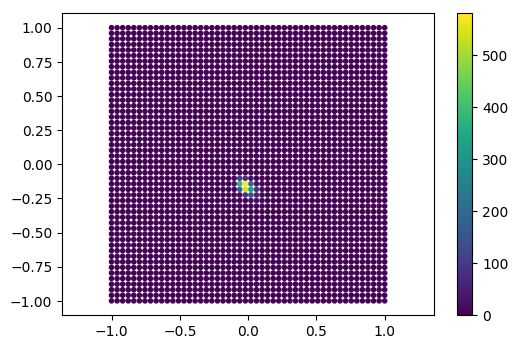

In [107]:
plt.scatter(tel1.pixel_tab[:,0], tel1.pixel_tab[:,1], c=bc2,s=9)
plt.axis('equal')
plt.colorbar()

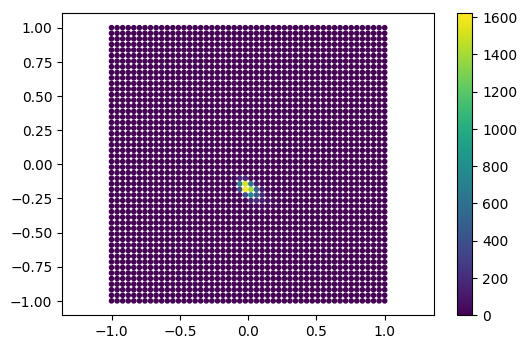

In [108]:
plt.scatter(tel1.pixel_tab[:,0], tel1.pixel_tab[:,1], c=bc,s=9)
plt.axis('equal')
plt.colorbar()

In [98]:
def f(f2, *args):
    return f2(*args)

In [80]:
def f2(a):
    return a**2

In [81]:
f(f2, 4)

16

In [102]:
reload(ci)

<module 'pschitt.camera_image' from '/Users/thomasvuillaume/anaconda/lib/python3.5/site-packages/pschitt-1.0-py3.5.egg/pschitt/camera_image.py'>

In [83]:
def exp_fall(x, br, alpha):
    return 1 * (x<br) + np.exp(-alpha*(x-br)) * (x>=br)

In [100]:
x = np.arange(0,2,0.1)
e = exp_fall(x,1.3,1)

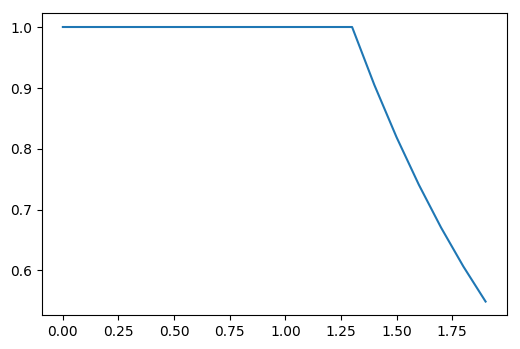

In [101]:
plt.plot(x,e)

In [103]:
reload(em)

<module 'pschitt.emission' from '/Users/thomasvuillaume/anaconda/lib/python3.5/site-packages/pschitt-1.0-py3.5.egg/pschitt/emission.py'>